# Image classification example (Cats-n-Dogs)
The open-source application “Cats-n-dogs” (link) will with some level of certainty take a guess as to whether an uploaded picture is a “Cat” or “Dog”. It’s quite basic with a rudimentary binary classification, and incorrectly predicts “Dog” when presented a picture of a cake (though probably influenced by training data pictures of dogs enjoying apple pies).

In this module we'll:
- Data 
- TODO

This example is closely based on https://www.kaggle.com/bavalpreet26/cnn-tutorial-keras-nb2. 

## Install Required Libraries

Import all the various libraries we'll be using in this module

In [30]:
%pip install scikit-learn
%pip install --user pillow

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
  Using cached https://files.pythonhosted.org/packages/30/bf/92385b4262178ca22b34f82e0e09c2922eb351fe39f3cc7b8ba9ea555b41/Pillow-7.2.0-cp36-cp36m-manylinux1_x86_64.whl
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


After installing python dependencies, make sure to restart the Kernel:
* From the menu: Kernel -> Restart

And then proceed with importing the libraries:

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


## Data Import

In [2]:
import urllib.request
url = 'https://s3.amazonaws.com/ml-experiments.spectrocloud.com/cats-n-dogs/cats-n-dogs-dataset.tar.gz'
filename = 'dataset.tar.gz'

print("Begin downloading dataset, this may take some time...")
urllib.request.urlretrieve(url, filename)
print("Dataset downloaded, beginning extraction...")
shutil.unpack_archive(filename, extract_path)
print("Done!")



Begin downloading dataset, this may take some time...
Dataset downloaded, beginning extraction...
Done!


In [4]:
extract_path = 'dataset'
train_path = extract_path + '/training_set'
test_path = extract_path + '/test_set'

### Show a few sample images

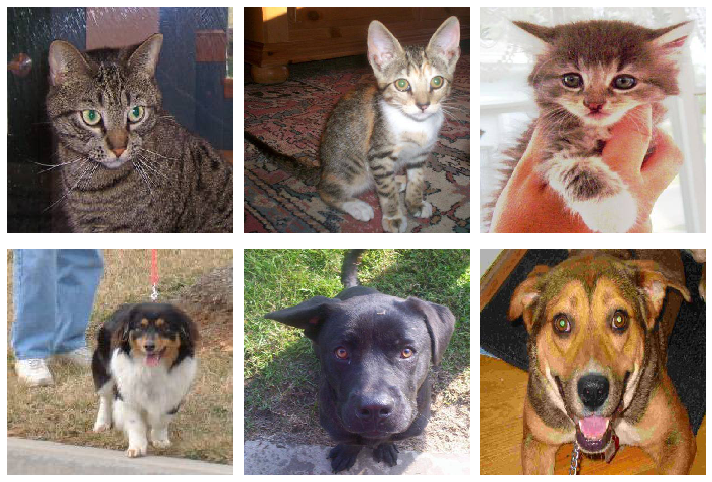

In [70]:
fig, axs = plt.subplots(2,3, figsize=(10,7))
axs = axs.flatten()

# fig.suptitle("Cats and Dogs")
cats = list("/cats/cat.%s.jpg" % n for n in [1,7,100])
dogs = list("/dogs/dog.%s.jpg" % n for n in [2,8,99])

for img, ax in zip(cats + dogs, axs):
    img = load_img("%s/%s" % (train_path, img), target_size=(224, 224))
    ax.imshow(img)
    ax.axis('off')
    
plt.tight_layout()


### Prepare images

Images used in deep-learning frameworks are generally preprocessed by centering the pixel values for each color channel. More information can be found by looking up the `tf.keras.applications.vgg16.preprocess_input` function.

An image generator can be used to return images of cats and dogs in batches of 10, along with their label. Cats are one-hot encoded as `(1,0)` where-as dogs will be `(0,1)`. The image generator also accepts a `preprocessing_function` to run the image preprocess step for each batch of images returned.

In [71]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=10, shuffle=False)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Build the CNN model

We'll build a simple convolution neural network model using Keras

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

The model is built with an input layer, ....

## Make sure to git push!!!